In [2]:
from pycoingecko import CoinGeckoAPI
import pandas as pd

cg = CoinGeckoAPI()
ohlc = cg.get_coin_ohlc_by_id(id = 'bitcoin', vs_currency = 'usd', days = '365')
df = pd.DataFrame(ohlc, columns = ['date', 'open', 'high', 'low', 'close'])
df['date'] = pd.to_datetime(df['date'], unit = 'ms')
df.set_index('date', inplace = True)

df


,open,high,low,close
date,,,,
2023-10-02,26966.0,28042.0,26958.0,27968.0
2023-10-06,27988.0,28494.0,27265.0,27436.0
2023-10-10,27408.0,28179.0,27243.0,27594.0
2023-10-14,27585.0,27726.0,26570.0,26841.0
2023-10-18,26861.0,29483.0,26816.0,28418.0
...,...,...,...,...
2024-09-14,57023.0,60655.0,55573.0,60621.0
2024-09-18,60545.0,61243.0,57559.0,60317.0
2024-09-22,60320.0,64082.0,59212.0,63403.0


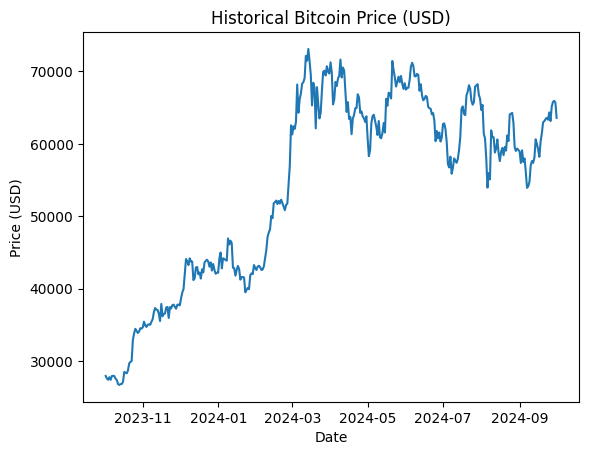

In [3]:
import pycoingecko
import matplotlib.pyplot as plt
import datetime

# Initialize CoinGecko API client
coinGecko = pycoingecko.CoinGeckoAPI()
# Get historical price data for Bitcoin
btc_data = coinGecko.get_coin_market_chart_by_id('bitcoin', 'usd', '365days')
# Extract the dates and prices from the data
dates = [data[0] for data in btc_data['prices']]
# convert unix timestamp to datetime
dates = [
    datetime.datetime.fromtimestamp(date/1000)
    for date in dates
]
prices = [data[1] for data in btc_data['prices']]
# Plot the data
plt.plot(dates, prices)
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Historical Bitcoin Price (USD)')
plt.show()

In [10]:
# make a 2 column dataframe with dates and prices
df = pd.DataFrame({'date': dates, 'price': prices})
df

,date,price
0,2023-10-01 21:00:00,27967.510579
1,2023-10-02 21:00:00,27615.064885
2,2023-10-03 21:00:00,27439.121947
3,2023-10-04 21:00:00,27792.111277
4,2023-10-05 21:00:00,27435.874615
...,...,...
361,2024-09-26 21:00:00,65130.768840
362,2024-09-27 21:00:00,65791.002125
363,2024-09-28 21:00:00,65934.107094
364,2024-09-29 21:00:00,65663.689867


In [33]:
# make a dictionary with prices and dates
data = {}   

for d, p in zip(dates, prices):
    data[d] = p

balance = []
multiplier = 1
orderPrice = 0
for d, p in data.items():
    if orderPrice == 0:
        orderPrice = p
        bet = int(orderPrice * 0.1)
        targetPrice = orderPrice + bet
    if p >= targetPrice:
        profit = (p - orderPrice) * multiplier
        balance.append(profit)
        #bet = int(profit / multiplier)
        print(f"Buy at {orderPrice:.2f} and sell at {p:.2f} for a profit of {profit:.2f} Bet: {bet}, on date {d}")
        multiplier -= 1
        if multiplier == 0:
            multiplier = 1
        orderPrice = p
        bet = int(orderPrice * 0.1)
        targetPrice = orderPrice + bet
        print(f"New target price: {targetPrice:.2f}, multiplier: {multiplier}")
        print()
    elif p <= orderPrice - bet:
        profit = (p - orderPrice) * multiplier
        balance.append(profit)
        #bet = - int(profit / multiplier)
        print(f"Buy at {orderPrice:.2f} and sell at {p:.2f} for a loss of {profit:.2f}. Bet: {bet}, on date {d}")
        multiplier += 1
        orderPrice = p
        bet = int(orderPrice * 0.1)
        targetPrice = orderPrice + bet
        print(f"New target price: {targetPrice:.2f}, multiplier: {multiplier}")
        print()

balance = [round(x,2) for x in balance]
print(balance)
print(sum(balance))





Buy at 27967.51 and sell at 32953.26 for a profit of 4985.75 Bet: 2796, on date 2023-10-23 21:00:00
New target price: 36248.26, multiplier: 1

Buy at 32953.26 and sell at 36768.42 for a profit of 3815.16 Bet: 3295, on date 2023-11-09 21:00:00
New target price: 40444.42, multiplier: 1

Buy at 36768.42 and sell at 41974.33 for a profit of 5205.91 Bet: 3676, on date 2023-12-04 21:00:00
New target price: 46171.33, multiplier: 1

Buy at 41974.33 and sell at 46936.19 for a profit of 4961.85 Bet: 4197, on date 2024-01-08 21:00:00
New target price: 51629.19, multiplier: 1

Buy at 46936.19 and sell at 41800.93 for a loss of -5135.25. Bet: 4693, on date 2024-01-14 21:00:00
New target price: 45980.93, multiplier: 2

Buy at 41800.93 and sell at 47143.24 for a profit of 10684.62 Bet: 4180, on date 2024-02-09 21:00:00
New target price: 51857.24, multiplier: 1

Buy at 47143.24 and sell at 51958.23 for a profit of 4814.99 Bet: 4714, on date 2024-02-15 21:00:00
New target price: 57153.23, multiplier: 1

In [34]:
# make a dictionary with prices and dates
# follow trend
data = {}   

for d, p in zip(dates, prices):
    data[d] = p

trendBullish = True
balance = []
multiplier = 1
orderPrice = 0
for d, p in data.items():
    if orderPrice == 0:
        orderPrice = p
        bet = int(orderPrice * 0.1)
        upTargetPrice = orderPrice + bet
        downTargetPrice = orderPrice - bet
    #win
    if p >= upTargetPrice and trendBullish:
        profit = (p - orderPrice) * multiplier
        balance.append(profit)
        print(f"Buy at {orderPrice:.2f} and sell at {p:.2f} for a profit of {profit:.2f} Bet: {bet}, on date {d}")
        multiplier -= 1
        if multiplier == 0:
            multiplier = 1
        orderPrice = p
        bet = int(orderPrice * 0.1)
        upTargetPrice = orderPrice + bet
        downTargetPrice = orderPrice - bet
        print(f"New target price: {upTargetPrice:.2f}, multiplier: {multiplier}")
        print()
    elif p <= downTargetPrice and not trendBullish:
        profit = (orderPrice - p) * multiplier
        balance.append(profit)
        print(f"Buy at {orderPrice:.2f} and sell at {p:.2f} for a profit of {profit:.2f} Bet: {bet}, on date {d}")
        multiplier -= 1
        if multiplier == 0:
            multiplier = 1
        orderPrice = p
        bet = int(orderPrice * 0.1)
        upTargetPrice = orderPrice + bet
        downTargetPrice = orderPrice - bet
        print(f"New target price: {downTargetPrice:.2f}, multiplier: {multiplier}")
        print()
        
    
    #loss
    elif p >= upTargetPrice and not trendBullish:
        profit = (orderPrice - p) * multiplier
        balance.append(profit)
        print(f"Buy at {orderPrice:.2f} and sell at {p:.2f} for a loss of {profit:.2f}. Bet: {bet}, on date {d}")
        multiplier += 1
        orderPrice = p
        bet = int(orderPrice * 0.1)
        upTargetPrice = orderPrice + bet
        downTargetPrice = orderPrice - bet
        trendBullish = not trendBullish
        print(f"New target price: {upTargetPrice:.2f}, multiplier: {multiplier}")
        print()

        
    elif p <= downTargetPrice and trendBullish:
        profit = (p - orderPrice) * multiplier
        balance.append(profit)
        print(f"Buy at {orderPrice:.2f} and sell at {p:.2f} for a loss of {profit:.2f}. Bet: {bet}, on date {d}")
        multiplier += 1
        orderPrice = p
        bet = int(orderPrice * 0.1)
        upTargetPrice = orderPrice + bet
        downTargetPrice = orderPrice - bet
        trendBullish = not trendBullish
        print(f"New target price: {downTargetPrice:.2f}, multiplier: {multiplier}")
        print()
        
        
balance = [round(x,2) for x in balance]
print(balance)
print(sum(balance))

            




Buy at 27967.51 and sell at 32953.26 for a profit of 4985.75 Bet: 2796, on date 2023-10-23 21:00:00
New target price: 36248.26, multiplier: 1

Buy at 32953.26 and sell at 36768.42 for a profit of 3815.16 Bet: 3295, on date 2023-11-09 21:00:00
New target price: 40444.42, multiplier: 1

Buy at 36768.42 and sell at 41974.33 for a profit of 5205.91 Bet: 3676, on date 2023-12-04 21:00:00
New target price: 46171.33, multiplier: 1

Buy at 41974.33 and sell at 46936.19 for a profit of 4961.85 Bet: 4197, on date 2024-01-08 21:00:00
New target price: 51629.19, multiplier: 1

Buy at 46936.19 and sell at 41800.93 for a loss of -5135.25. Bet: 4693, on date 2024-01-14 21:00:00
New target price: 37620.93, multiplier: 2

Buy at 41800.93 and sell at 47143.24 for a loss of -10684.62. Bet: 4180, on date 2024-02-09 21:00:00
New target price: 51857.24, multiplier: 3

Buy at 47143.24 and sell at 51958.23 for a profit of 14444.96 Bet: 4714, on date 2024-02-15 21:00:00
New target price: 57153.23, multiplier: 